In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.optimizers import adam_v2
%matplotlib inline
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("gas_turbines.csv")
data.head() 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data = data.drop(columns = ['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'], axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
data.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


In [8]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [10]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(x_train))
xtrain_scale=scaler_x.transform(x_train)

print(scaler_x.fit(x_test))
xtest_scale=scaler_x.transform(x_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


### Neural Network Modelling

In [13]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2100,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
 dense_4 (Dense)             (None, 2100)              10500     
                                                                 
 dense_5 (Dense)             (None, 1)                 2101      
                                                                 
Total params: 12,617
Trainable params: 12,617
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [18]:
history = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 1s 9ms/step - loss: 0.0701 - mse: 0.0701 - mae: 0.2032 - val_loss: 0.0442 - val_mse: 0.0442 - val_mae: 0.1543
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0435 - mse: 0.0435 - mae: 0.1545 - val_loss: 0.0428 - val_mse: 0.0428 - val_mae: 0.1593
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0425 - mse: 0.0425 - mae: 0.1597 - val_loss: 0.0411 - val_mse: 0.0411 - val_mae: 0.1559
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0417 - mse: 0.0417 - mae: 0.1577 - val_loss: 0.0406 - val_mse: 0.0406 - val_mae: 0.1571
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0409 - mse: 0.0409 - mae: 0.1590 - val_loss: 0.0410 - val_mse: 0.0410 - val_mae: 0.1580
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0408 - mse: 0.0408 - mae: 0.1586 - val_loss: 0.0397 - val_mse: 0.0397 - val_mae: 0.1573
Epoch 7/100
48/48 [===

48/48 [==============================] - 0s 5ms/step - loss: 0.0382 - mse: 0.0382 - mae: 0.1531 - val_loss: 0.0384 - val_mse: 0.0384 - val_mae: 0.1561
Epoch 52/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.1561 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1539
Epoch 53/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0386 - mse: 0.0386 - mae: 0.1548 - val_loss: 0.0380 - val_mse: 0.0380 - val_mae: 0.1550
Epoch 54/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0383 - mse: 0.0383 - mae: 0.1544 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1560
Epoch 55/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0381 - mse: 0.0381 - mae: 0.1530 - val_loss: 0.0379 - val_mse: 0.0379 - val_mae: 0.1518
Epoch 56/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0386 - mse: 0.0386 - mae: 0.1547 - val_loss: 0.0392 - val_mse: 0.0392 - val_mae: 0.1578
Epoch 57/100
48/48 [=========

In [20]:
y_predict = model.predict(xtest_scale)

141/141 [==============================] - 0s 1ms/step


In [22]:
model_history = pd.DataFrame(history.history)
model_history["epoch"]=history.epoch
model_history.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038973,0.038973,0.155037,0.038958,0.038958,0.157735,95
96,0.038389,0.038389,0.155114,0.038313,0.038313,0.151958,96
97,0.038047,0.038047,0.152300,0.037889,0.037889,0.151420,97
98,0.038028,0.038028,0.152449,0.037953,0.037953,0.152223,98
99,0.038109,0.038109,0.152749,0.038001,0.038001,0.152425,99


#### Visualize Training History

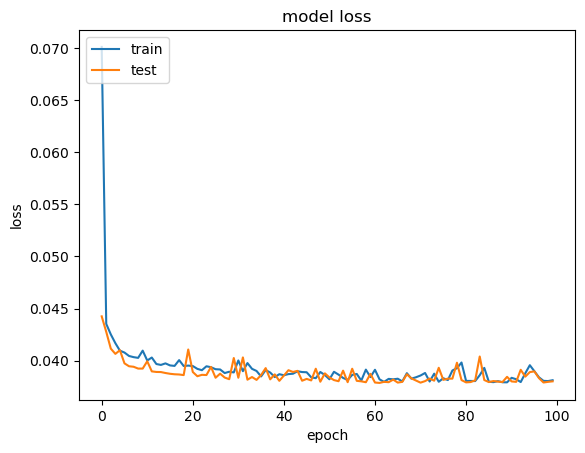

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

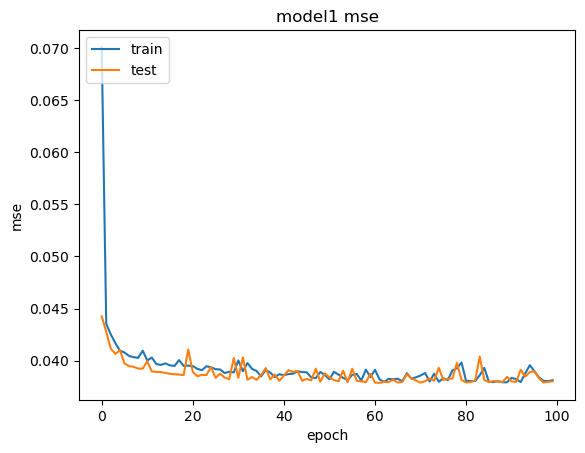

In [24]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

### Tuning of Hyperparameters :- Learning rate and Drop out rate

In [25]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(tf.keras.layers.Dense(4, input_dim = 3, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(2100,input_dim = 3, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = learning_rate)

    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['mse', 'mae'])
    
    return model

In [31]:
model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 150,
                        epochs = 100)

In [36]:
# Define the grid search parameters

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,
                   dropout_rate = dropout_rate)

In [38]:
grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

In [39]:
grid_result = grid.fit(xtrain_scale,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  17.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  20.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  19.8s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  20.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  20.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END d

In [40]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Activation Function and Kernel Initializer

In [1]:
def create_model(activation_function, init):
    model = Sequential()
    model.add(tf.keras.layers.Dense(4, input_dim = 3, kernel_initializer = init, activation = activation_function))
    model.add(tf.keras.layers.Dense(2100,input_dim = 3, kernel_initializer = init, activation = activation_function))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = 0.001)

    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['mse', 'mae'])
    
    return model

In [49]:
model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 150,
                        epochs = 100)

In [50]:
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)

In [51]:
grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(xtrain_scale,ytrain_scale)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  29.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  27.2s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  27.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  24.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  25.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal.............

[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=  27.3s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=  26.1s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  26.8s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  25.7s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  26.3s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  26.2s
[CV 5/5; 11/12] START activation_function=linea

In [52]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'normal'}
nan,nan with: {'activation_function': 'softmax', 'init': 'zero'}
nan,nan with: {'activation_function': 'relu', 'init': 'uniform'}
nan,nan with: {'activation_function': 'relu', 'init': 'normal'}
nan,nan with: {'activation_function': 'relu', 'init': 'zero'}
nan,nan with: {'activation_function': 'tanh', 'init': 'uniform'}
nan,nan with: {'activation_function': 'tanh', 'init': 'normal'}
nan,nan with: {'activation_function': 'tanh', 'init': 'zero'}
nan,nan with: {'activation_function': 'linear', 'init': 'uniform'}
nan,nan with: {'activation_function': 'linear', 'init': 'normal'}
nan,nan with: {'activation_function': 'linear', 'init': 'zero'}


#### Number of Neurons in activation layer

In [57]:
def create_model(neuron1, neuron2):
    model = Sequential()
    model.add(tf.keras.layers.Dense(neuron1, input_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
    model.add(tf.keras.layers.Dense(neuron2,input_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = 0.001)

    model.compile(loss = 'mean_squared_error',
                  optimizer = adam,
                  metrics = ['mse'])
    
    return model

In [58]:
model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 150,
                        epochs = 100)

In [59]:
neuron1 = [4, 8, 16]
neuron2 = [4, 8, 16]

param_grids = dict(neuron1 = neuron1,
                   neuron2 = neuron2)

In [60]:
grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  20.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  18.8s
[CV 3/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 3/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  21.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 4/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  18.9s
[CV 5/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 5/5; 1/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  18.8s
[CV 1/5; 2/9] START neuron1=4, neuron2=8........................................
[CV 1/5; 2/9] END ...........neuron1=4, neuron2=8

In [62]:
print('Best : {}, using {}'.format(grid_result.,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'neuron1': 4, 'neuron2': 4}
nan,nan with: {'neuron1': 4, 'neuron2': 4}
nan,nan with: {'neuron1': 4, 'neuron2': 8}
nan,nan with: {'neuron1': 4, 'neuron2': 16}
nan,nan with: {'neuron1': 8, 'neuron2': 4}
nan,nan with: {'neuron1': 8, 'neuron2': 8}
nan,nan with: {'neuron1': 8, 'neuron2': 16}
nan,nan with: {'neuron1': 16, 'neuron2': 4}
nan,nan with: {'neuron1': 16, 'neuron2': 8}
nan,nan with: {'neuron1': 16, 'neuron2': 16}


#### final model

In [63]:
model = Sequential()
model.add(tf.keras.layers.Dense(4, input_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
model.add(tf.keras.layers.Dense(4,input_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    
adam = adam_v2.Adam(lr = 0.001)

model.compile(loss = 'mean_squared_error', 
              optimizer = adam, 
              metrics = ['mean_squared_error'])

In [64]:
y_predict = model.predict(xtest_scale)

141/141 [==============================] - 0s 2ms/step


In [66]:
history = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 1s 13ms/step - loss: 0.5151 - mean_squared_error: 0.5151 - val_loss: 0.4248 - val_mean_squared_error: 0.4248
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.3548 - mean_squared_error: 0.3548 - val_loss: 0.2896 - val_mean_squared_error: 0.2896
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.2405 - mean_squared_error: 0.2405 - val_loss: 0.1954 - val_mean_squared_error: 0.1954
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.1626 - mean_squared_error: 0.1626 - val_loss: 0.1330 - val_mean_squared_error: 0.1330
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.0933 - val_mean_squared_error: 0.0933
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0700 - val_mean_squared_error: 0.0700
Epoch 7/100
48/48 [==============

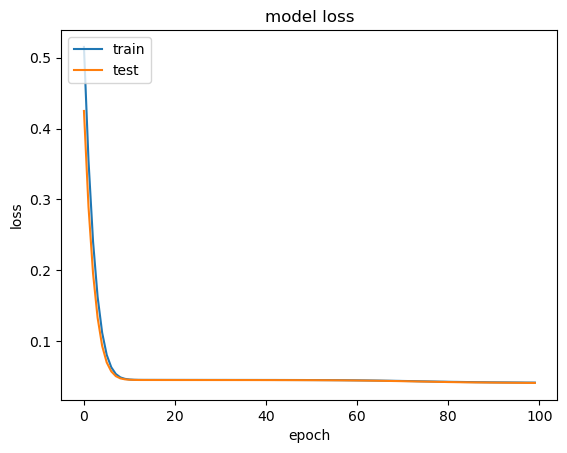

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
model.evaluate(xtest_scale, ytest_scale)

141/141 [==============================] - 0s 3ms/step - loss: 0.0426 - mean_squared_error: 0.0426


[0.04258372634649277, 0.04258372634649277]

After tuning each hyper-parameters mean_squared_error got reduced by 97%.